In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [10]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.copy()
Y = numeros['target']
print(np.shape(X))

(1797, 8, 8)


In [11]:
inputs = torch.autograd.Variable(torch.Tensor(X).float()).unsqueeze(1)
print(inputs.size())

torch.Size([1797, 1, 8, 8])


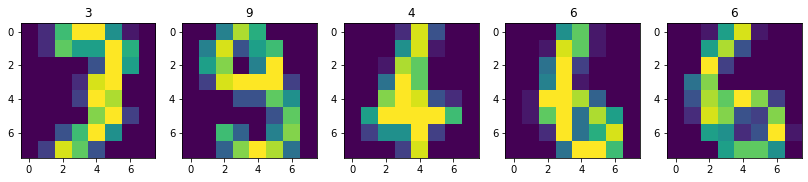

In [12]:
# muestra algunos ejemplos

n_items = inputs.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(inputs[item][0].detach().numpy())
    plt.title(Y[item])

In [13]:
# normaliza
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i])/std
np.shape(inputs)


torch.Size([1797, 1, 8, 8])

In [14]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.Conv2d(8,4,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(4,8,kernel_size=3),
            torch.nn.ConvTranspose2d(8,16,kernel_size=3),
            torch.nn.ConvTranspose2d(16,1,kernel_size=3))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [20]:
# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()
print(model.parameters())
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)

<generator object Module.parameters at 0x7f0ebb7089d0>


In [17]:
# entrenamiento
loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/400], loss:2.8824
epoch [2/400], loss:2.6461
epoch [3/400], loss:2.2904
epoch [4/400], loss:1.8400
epoch [5/400], loss:1.7389
epoch [6/400], loss:1.5561
epoch [7/400], loss:1.3725
epoch [8/400], loss:1.3813
epoch [9/400], loss:1.2839
epoch [10/400], loss:1.1929
epoch [11/400], loss:1.2022
epoch [12/400], loss:1.1198
epoch [13/400], loss:1.0688
epoch [14/400], loss:1.0700
epoch [15/400], loss:1.0626
epoch [16/400], loss:1.0312
epoch [17/400], loss:0.9911
epoch [18/400], loss:0.9676
epoch [19/400], loss:0.9670
epoch [20/400], loss:0.9581
epoch [21/400], loss:0.9313
epoch [22/400], loss:0.9108
epoch [23/400], loss:0.9011
epoch [24/400], loss:0.8914
epoch [25/400], loss:0.8765
epoch [26/400], loss:0.8609
epoch [27/400], loss:0.8507
epoch [28/400], loss:0.8448
epoch [29/400], loss:0.8351
epoch [30/400], loss:0.8213
epoch [31/400], loss:0.8103
epoch [32/400], loss:0.8039
epoch [33/400], loss:0.7980
epoch [34/400], loss:0.7903
epoch [35/400], loss:0.7826
epoch [36/400], loss:0.7769
e

epoch [288/400], loss:0.4947
epoch [289/400], loss:0.4946
epoch [290/400], loss:0.4946
epoch [291/400], loss:0.4945
epoch [292/400], loss:0.4944
epoch [293/400], loss:0.4943
epoch [294/400], loss:0.4942
epoch [295/400], loss:0.4941
epoch [296/400], loss:0.4940
epoch [297/400], loss:0.4939
epoch [298/400], loss:0.4939
epoch [299/400], loss:0.4938
epoch [300/400], loss:0.4937
epoch [301/400], loss:0.4936
epoch [302/400], loss:0.4935
epoch [303/400], loss:0.4934
epoch [304/400], loss:0.4933
epoch [305/400], loss:0.4933
epoch [306/400], loss:0.4932
epoch [307/400], loss:0.4931
epoch [308/400], loss:0.4930
epoch [309/400], loss:0.4929
epoch [310/400], loss:0.4929
epoch [311/400], loss:0.4928
epoch [312/400], loss:0.4927
epoch [313/400], loss:0.4926
epoch [314/400], loss:0.4925
epoch [315/400], loss:0.4925
epoch [316/400], loss:0.4924
epoch [317/400], loss:0.4923
epoch [318/400], loss:0.4922
epoch [319/400], loss:0.4921
epoch [320/400], loss:0.4921
epoch [321/400], loss:0.4920
epoch [322/400

In [18]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)
print(latent_space.size())

torch.Size([1797, 4, 2, 2])
